# Robotics: Navigating Space

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score, precision_score, recall_score, f1_score

In [2]:
def set_plot_style(ax):
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.spines['bottom'].set_color('green')
    ax.spines['top'].set_color('green')
    ax.spines['left'].set_color('green')
    ax.spines['right'].set_color('green')
    ax.tick_params(axis='both', which='major', labelsize=12, colors='green')

In [3]:
np.random.seed(42)

In [ ]:
# Create map
navigable_space = np.random.randn(100, 2) + [5, 5]
obstacles = np.random.randn(20, 2) + [2,2]
data = np.vstack((navigable_space, obstacles))

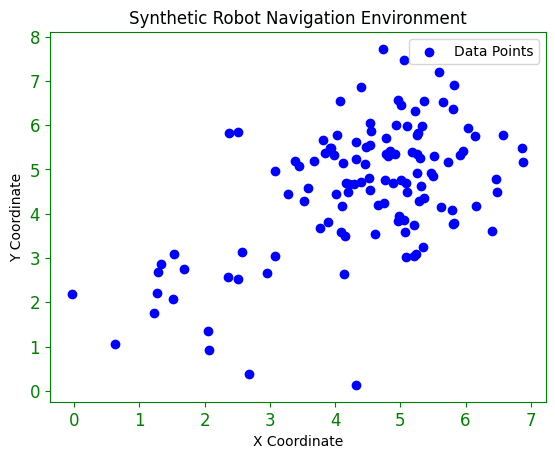

In [5]:
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], c='blue', label='Data Points')
ax.set_title('Synthetic Robot Navigation Environment')
set_plot_style(ax)
ax.legend()
plt.show()

In [6]:
# KMean Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

In [7]:
# Evaluation
silhouette_avg = silhouette_score(data, kmeans_labels)
print(f'Silhouette Score for KMeans Clustering: {silhouette_avg:2f}')

Silhouette Score for KMeans Clustering: 0.588371


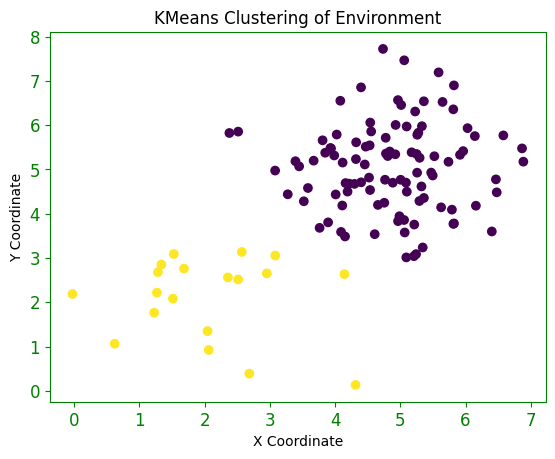

In [8]:
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', label='Cluster Points')
ax.set_title('KMeans Clustering of Environment')
set_plot_style(ax)
plt.show()

In [ ]:
# Apply Isolation Forest for anomaly (obstacle) detection
iso_forest = IsolationForest(contamination=0.2, random_state=42)
iso_forest.fit(data)
anomaly_labels = iso_forest.predict(data)
anomaly_labels_binary = (anomaly_labels == -1).astype(int)
true_labels = np.array([0] * 100 + [1] * 20) # Assuming last 20 are obstacles

In [10]:
precision = precision_score(true_labels, anomaly_labels_binary)
recall = recall_score(true_labels, anomaly_labels_binary)
f1 = f1_score(true_labels, anomaly_labels_binary)
print(f'Precision: {precision:2f}')
print(f'Recall: {recall:2f}')
print(f'F1-Score: {f1:2f}')

Precision: 0.583333
Recall: 0.700000
F1-Score: 0.636364


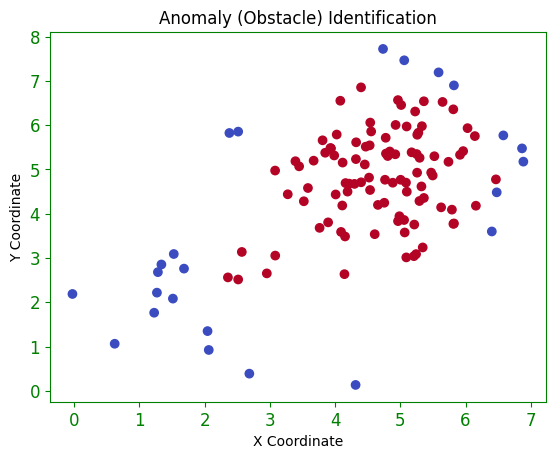

In [11]:
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], c=anomaly_labels, cmap='coolwarm', label='Anomaly Detection')
ax.set_title('Anomaly (Obstacle) Identification')
set_plot_style(ax)
plt.show()